In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data= pd.read_csv('titanic_train.csv')#,index_col=0)

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
del data['PassengerId']

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [11]:
data['Ticket'].nunique()

681

In [12]:
data['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [13]:
data[data['Ticket']=='347082']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


In [14]:
681/891

0.7643097643097643

In [15]:
del data['Ticket']

In [16]:
del data['Name']

In [17]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [19]:
pd.isnull(data).sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [20]:
100*(pd.isnull(data).sum()/len(data))

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [21]:
del data['Cabin']

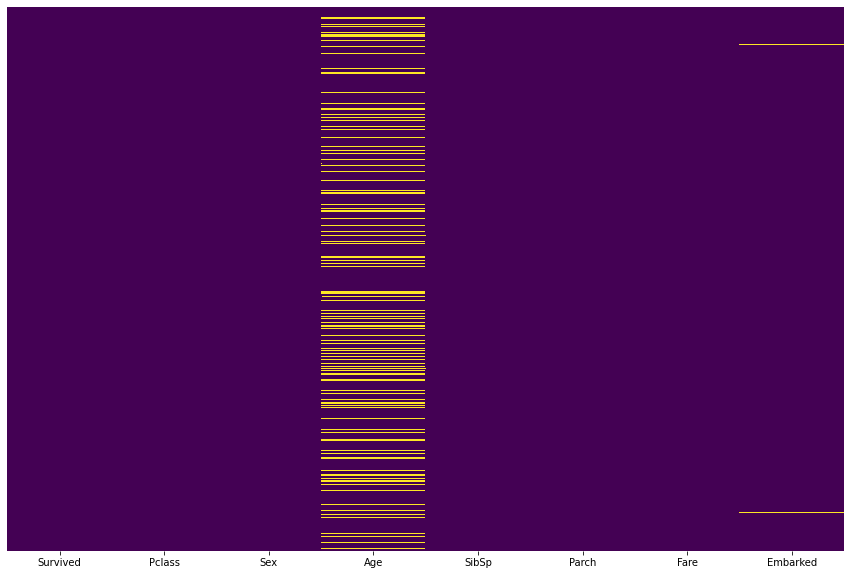

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.isnull(data),cmap='viridis',cbar=False,yticklabels=[])

In [28]:
100*(pd.isnull(data).sum()/len(data))

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

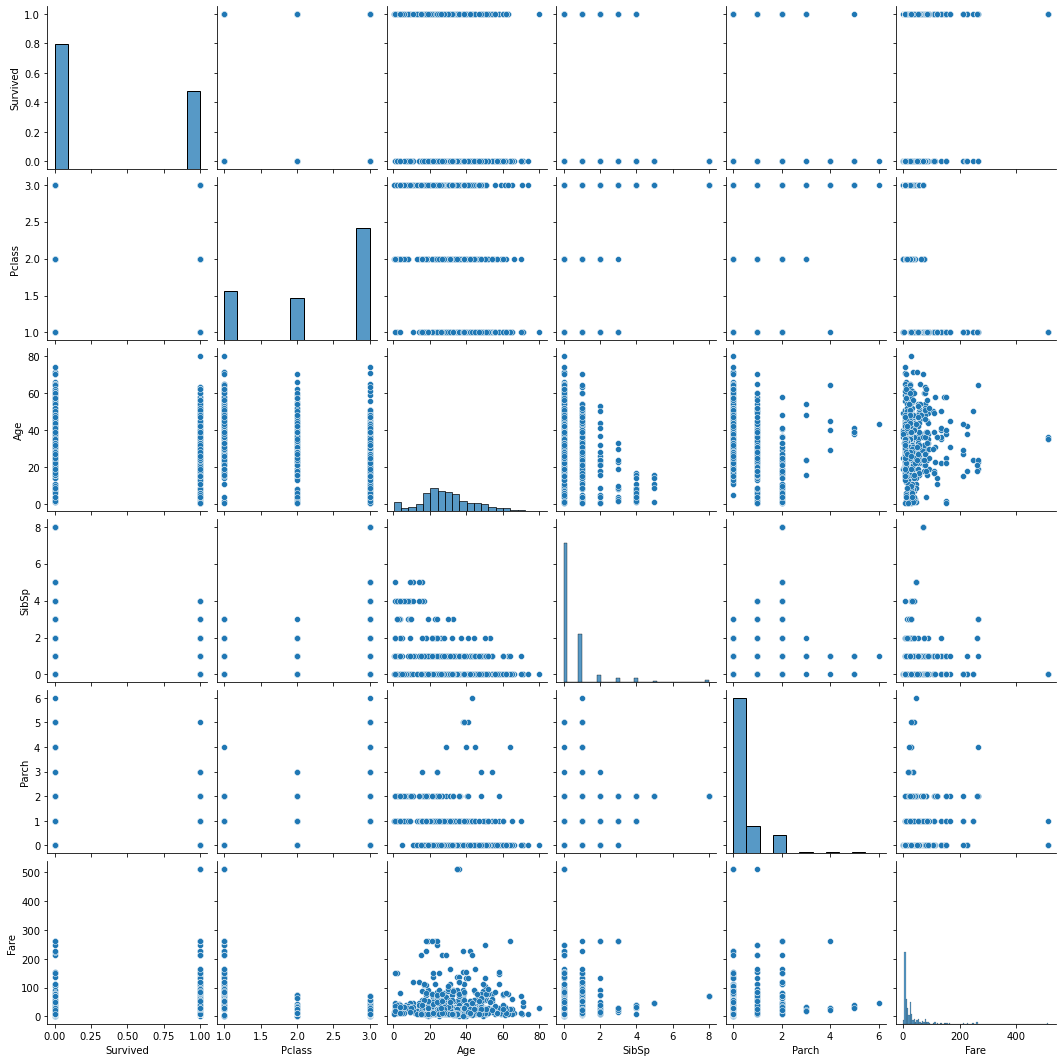

In [30]:
sns.pairplot(data)

In [32]:
sns.set_style('whitegrid')

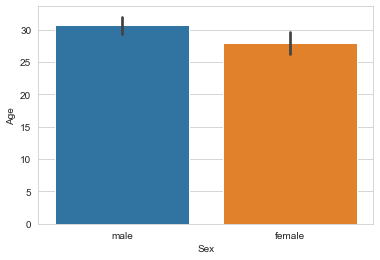

In [33]:
sns.barplot(x='Sex',y='Age',data=data)

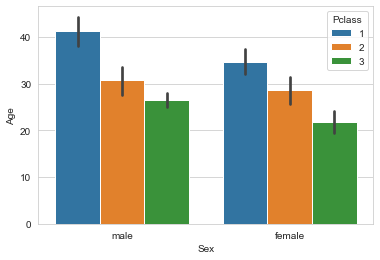

In [34]:
sns.barplot(x='Sex',y='Age',data=data,hue='Pclass')

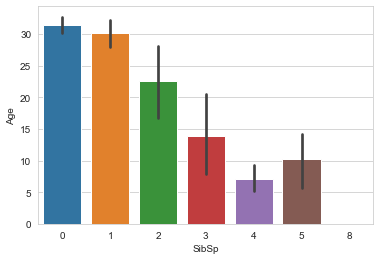

In [35]:
sns.barplot(x='SibSp',y='Age',data=data)

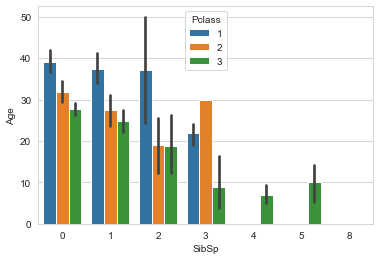

In [36]:
sns.barplot(x='SibSp',y='Age',data=data,hue='Pclass')

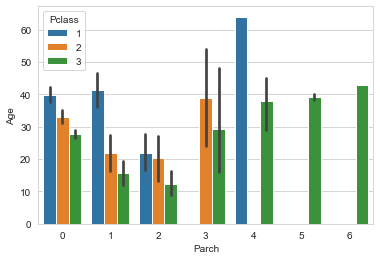

In [37]:
sns.barplot(x='Parch',y='Age',data=data,hue='Pclass')

In [40]:
def fill_missing(x):
    age = x['Age']
    sex = x['Sex']
    pclass = x['Pclass']
    if pd.isnull(age):
        return data[(data['Sex']==sex)&(data['Pclass']==pclass)]['Age'].mean()
    else:
        return age

In [42]:
data['Age'] = data[['Sex','Pclass','Age']].apply(fill_missing,axis=1)

In [43]:
100*(pd.isnull(data).sum()/len(data))

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.000000
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.224467
dtype: float64

In [44]:
data.dropna(inplace=True)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [47]:
data = pd.get_dummies(data)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [48]:
x = data.drop('Survived',axis=1)
y = data['Survived']

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=100)

In [51]:
from sklearn.linear_model import LogisticRegression

In [54]:
model_logi = LogisticRegression().fit(xtrain,ytrain)

In [55]:
model_logi.score(xtest,ytest)

0.7865168539325843

In [56]:
ypred = model_logi.predict(xtest)

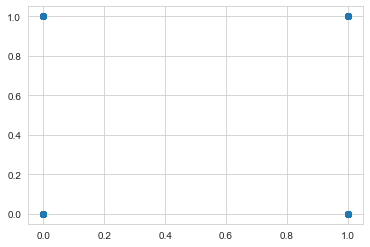

In [57]:
plt.scatter(ytest.values,ypred)